# Задание
на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый 
- использовать классификацию методом k-ближайших соседей
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

piz_df=pd.read_csv('https://raw.githubusercontent.com/GVicSt/DataSets/main/pizas_data_small.csv', sep='\t')

C:\Users\a\AppData\Local\Temp\ipykernel_17020\2250229648.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


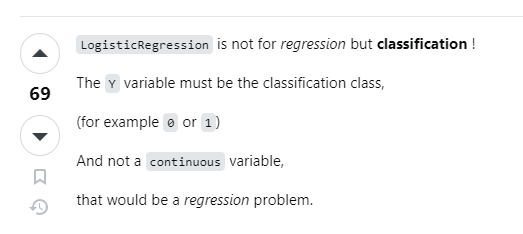

как я понял из текста выше, переменная Y должна быть 1 или 0, так что пришлось переделывать колонку популярности в таблице на 1 или 0..

In [2]:
for i in range(len(piz_df)):
  piz_df.loc[i,'популярность'] = 1 if piz_df['популярность'][i] >= 0.7 else 0

piz_df

,имя,размер(см),популярность,эксклюзивность,цена(руб),калории,масса(грамм)
0,Margherita,30.5,1.0,0.2,749.70,250,350
1,Pepperoni,35.2,1.0,0.3,936.48,320,420
2,Hawaiian,28.0,1.0,0.1,819.89,280,380
3,Veggie Supreme,32.8,0.0,0.2,878.71,290,400
4,BBQ Chicken,33.5,1.0,0.3,982.88,350,460
5,Meat Lovers,36.0,1.0,0.4,1124.01,420,550
6,Four Cheese,29.7,0.0,0.1,787.51,280,390
7,Pesto Delight,31.2,0.0,0.2,852.21,310,420
8,Supreme,34.0,1.0,0.3,1055.12,380,500
9,Mediterranean,30.8,1.0,0.2,868.61,300,410


разделяю данные на целевые и другие

разделяю данные на тренировочные и тестовые

In [3]:
x = piz_df[['размер(см)','цена(руб)','эксклюзивность','масса(грамм)','калории']]
y = piz_df['популярность'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
y_test = pd.DataFrame(y_test).values.ravel()
y_train = pd.DataFrame(y_train).values.ravel()
print(f'размеры наборов:\n  x_train: {x_train.shape}\ty_train: {y_train.shape}\n  x_test: {x_test.shape}\ty_test: {y_test.shape}')

размеры наборов:
  x_train: (9, 5)	y_train: (9,)
  x_test: (6, 5)	y_test: (6,)


использую материал из лекции, только переделал его под себя

In [185]:
def fit_eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    print("отчёт классификации:\n\t\t\tтренировочного набора:\n")
    print(metrics.classification_report(y_train,y_hat_train, digits=4))
    print("\n\t\t\tтестового набора:\n")
    print(metrics.classification_report(y_test,y_hat_test, digits=4))
    print("\n\t\tматрица конфузий и ROC & AUC график:")
    fig, axes = plt.subplots(ncols=2, figsize=(10,5))
    
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes[0])
    axes[0].set_title('Матрица конфузий')
    
    metrics.RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])
    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC График')
    
    plt.tight_layout()
    plt.show()

без маштабирования(стандартизации)

результаты при 1 ближайших соседях
отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000         4
         1.0     1.0000    1.0000    1.0000         5

    accuracy                         1.0000         9
   macro avg     1.0000    1.0000    1.0000         9
weighted avg     1.0000    1.0000    1.0000         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000         1
         1.0     0.7500    0.6000    0.6667         5

    accuracy                         0.5000         6
   macro avg     0.3750    0.3000    0.3333         6
weighted avg     0.6250    0.5000    0.5556         6


		матрица конфузий и ROC & AUC график:


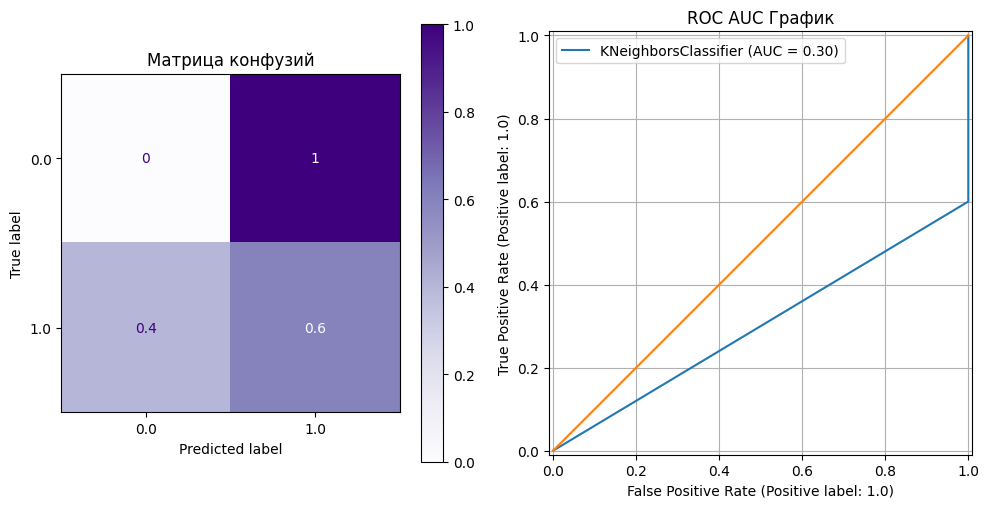

результаты при 2 ближайших соседях
отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     0.8000    1.0000    0.8889         4
         1.0     1.0000    0.8000    0.8889         5

    accuracy                         0.8889         9
   macro avg     0.9000    0.9000    0.8889         9
weighted avg     0.9111    0.8889    0.8889         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.3333    1.0000    0.5000         1
         1.0     1.0000    0.6000    0.7500         5

    accuracy                         0.6667         6
   macro avg     0.6667    0.8000    0.6250         6
weighted avg     0.8889    0.6667    0.7083         6


		матрица конфузий и ROC & AUC график:


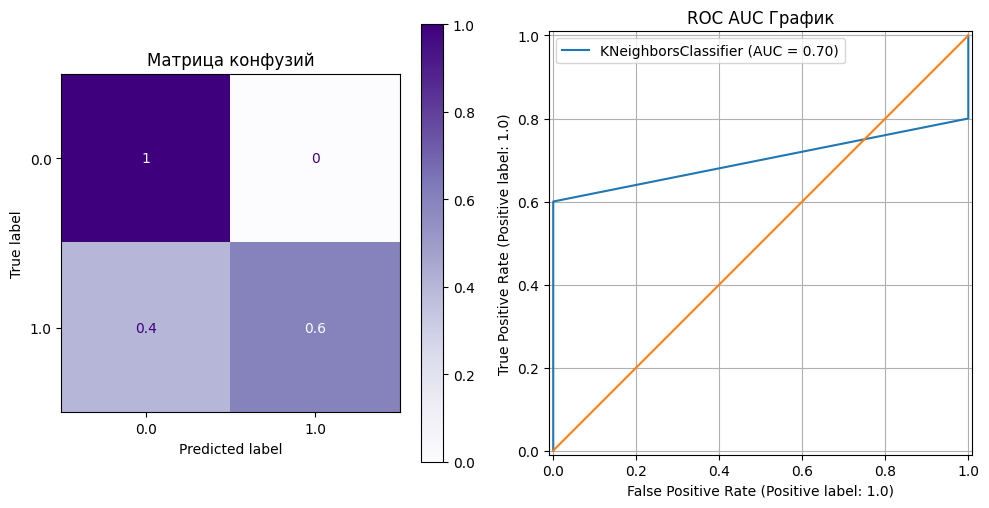

результаты при 3 ближайших соседях
отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     0.8000    1.0000    0.8889         4
         1.0     1.0000    0.8000    0.8889         5

    accuracy                         0.8889         9
   macro avg     0.9000    0.9000    0.8889         9
weighted avg     0.9111    0.8889    0.8889         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.3333    1.0000    0.5000         1
         1.0     1.0000    0.6000    0.7500         5

    accuracy                         0.6667         6
   macro avg     0.6667    0.8000    0.6250         6
weighted avg     0.8889    0.6667    0.7083         6


		матрица конфузий и ROC & AUC график:


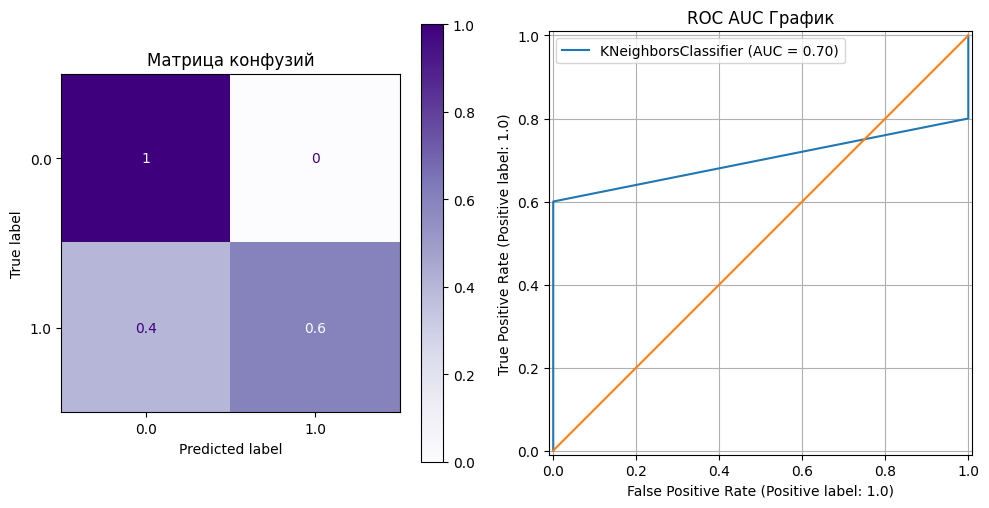

результаты при 4 ближайших соседях
отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     0.5714    1.0000    0.7273         4
         1.0     1.0000    0.4000    0.5714         5

    accuracy                         0.6667         9
   macro avg     0.7857    0.7000    0.6494         9
weighted avg     0.8095    0.6667    0.6407         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.2500    1.0000    0.4000         1
         1.0     1.0000    0.4000    0.5714         5

    accuracy                         0.5000         6
   macro avg     0.6250    0.7000    0.4857         6
weighted avg     0.8750    0.5000    0.5429         6


		матрица конфузий и ROC & AUC график:


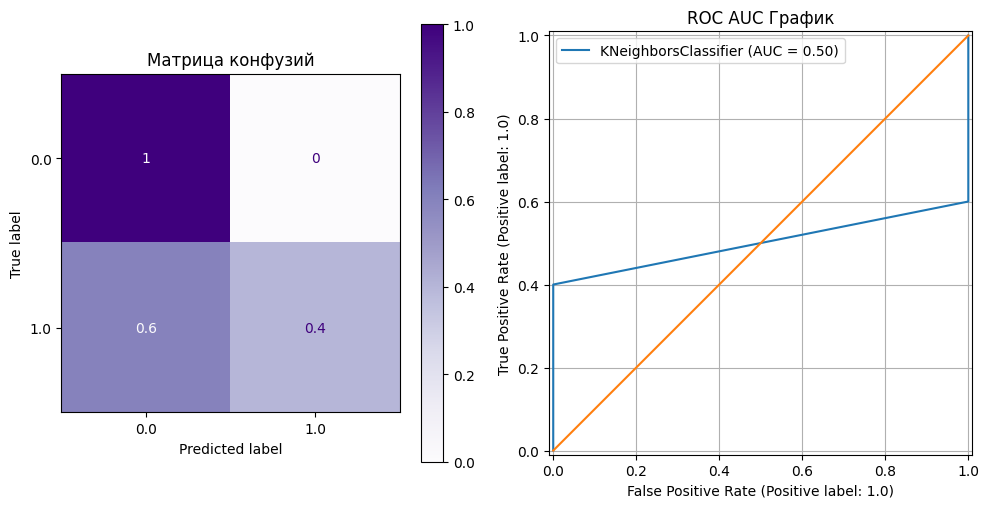

In [186]:
for i in [1,2,3,4]:
    print(f'результаты при {i} ближайших соседях')
    fit_eval(KNeighborsClassifier(n_neighbors=i), x_train, y_train, x_test, y_test)

максимально хорошего результата я смог добится только при 2-3 ближайших соседях, точность равна 0.7

при 1-ом рушится матрица конфузий и AUC = 0.3, это значит то, что предсказанные данные будут так сказать шиворот на выворот, то есть 1 предсказывается как 0 и наоборот

при 4-ех AUC = 0.5, это значит то, что предсказанные данные случайны

под хорошим результатам я понимаю данные ниже
то есть, где у матрицы конфузий, предсказанные 0 и 1 соответствуют истинным 0 и 1, а график AUC линии придерживается верха

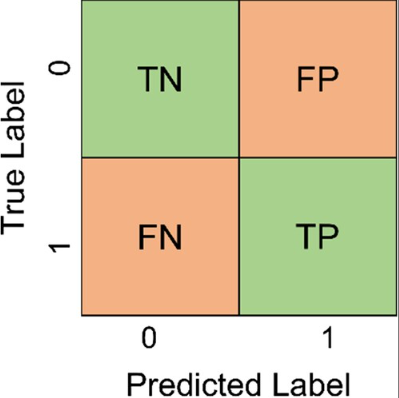
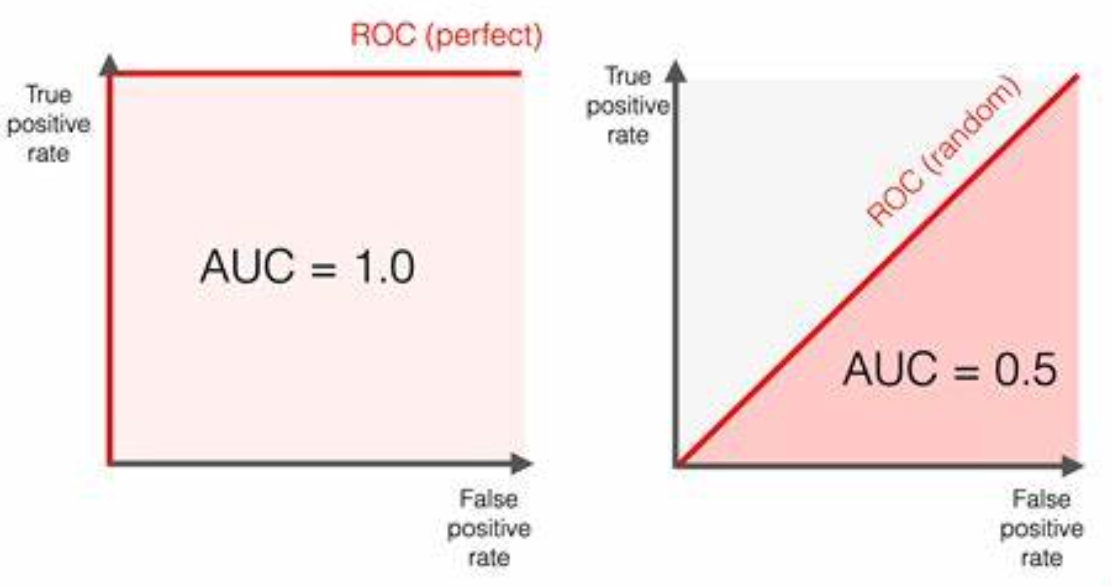

пробую маштабирование 
⬇⬇⬇⬇⬇⬇⬇⬇⬇⬇

In [143]:
scaler = StandardScaler().set_output(transform="pandas")
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [163]:
scaled_x_train

,размер(см),цена(руб),эксклюзивность,масса(грамм),калории
2,-1.518608,-0.682652,-1.333946,-0.905822,-0.822425
13,-0.225156,0.979627,0.848875,0.962435,0.978019
10,0.421569,-0.435804,-1.333946,-0.566139,-0.622376
7,-0.138926,-0.386288,-0.242536,-0.226455,-0.222277
11,0.723375,0.656396,0.848875,0.792594,0.777970
3,0.550914,-0.143291,-0.242536,-0.566139,-0.622376
0,-0.440732,-1.326271,-0.242536,-1.415346,-1.422574
5,1.930596,2.106029,1.940285,1.981485,1.978266
12,-1.303032,-0.767746,-0.242536,-0.056614,-0.022228


In [144]:
scaled_x_test

,размер(см),цена(руб),эксклюзивность,масса(грамм),калории
1,1.123713,-0.092085,0.894427,-0.505781,-0.253510
6,-1.623141,-1.671585,-1.788854,-1.333421,-1.470358
8,0.524399,1.165832,0.894427,1.701262,1.571762
9,-1.073770,-0.811698,-0.447214,-0.781661,-0.861934
14,0.774114,1.009652,-0.447214,0.321860,0.354914
4,0.274685,0.399885,0.894427,0.597741,0.659126


результаты при 4 ближайших соседях
отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     0.5000    1.0000    0.6667         4
         1.0     1.0000    0.2000    0.3333         5

    accuracy                         0.5556         9
   macro avg     0.7500    0.6000    0.5000         9
weighted avg     0.7778    0.5556    0.4815         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.2000    1.0000    0.3333         1
         1.0     1.0000    0.2000    0.3333         5

    accuracy                         0.3333         6
   macro avg     0.6000    0.6000    0.3333         6
weighted avg     0.8667    0.3333    0.3333         6


		матрица конфузий и ROC & AUC график:


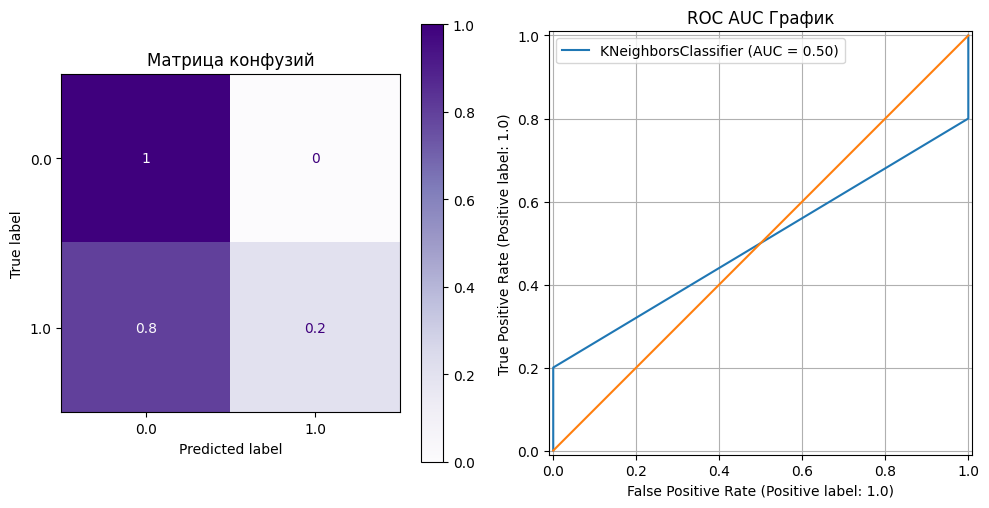

результаты при 5 ближайших соседях
отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     0.5714    1.0000    0.7273         4
         1.0     1.0000    0.4000    0.5714         5

    accuracy                         0.6667         9
   macro avg     0.7857    0.7000    0.6494         9
weighted avg     0.8095    0.6667    0.6407         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.2000    1.0000    0.3333         1
         1.0     1.0000    0.2000    0.3333         5

    accuracy                         0.3333         6
   macro avg     0.6000    0.6000    0.3333         6
weighted avg     0.8667    0.3333    0.3333         6


		матрица конфузий и ROC & AUC график:


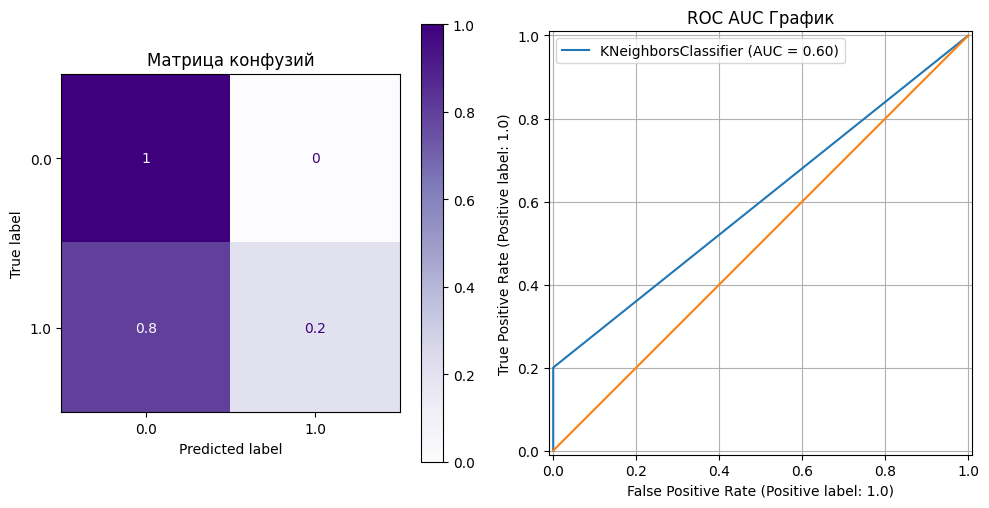

результаты при 6 ближайших соседях
отчёт классификации:
			тренировочного набора:

              precision    recall  f1-score   support

         0.0     0.4444    1.0000    0.6154         4
         1.0     0.0000    0.0000    0.0000         5

    accuracy                         0.4444         9
   macro avg     0.2222    0.5000    0.3077         9
weighted avg     0.1975    0.4444    0.2735         9


			тестового набора:

              precision    recall  f1-score   support

         0.0     0.1667    1.0000    0.2857         1
         1.0     0.0000    0.0000    0.0000         5

    accuracy                         0.1667         6
   macro avg     0.0833    0.5000    0.1429         6
weighted avg     0.0278    0.1667    0.0476         6


		матрица конфузий и ROC & AUC график:


c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\3.11.6\Lib\site-packages\sklearn\metrics\_classificati

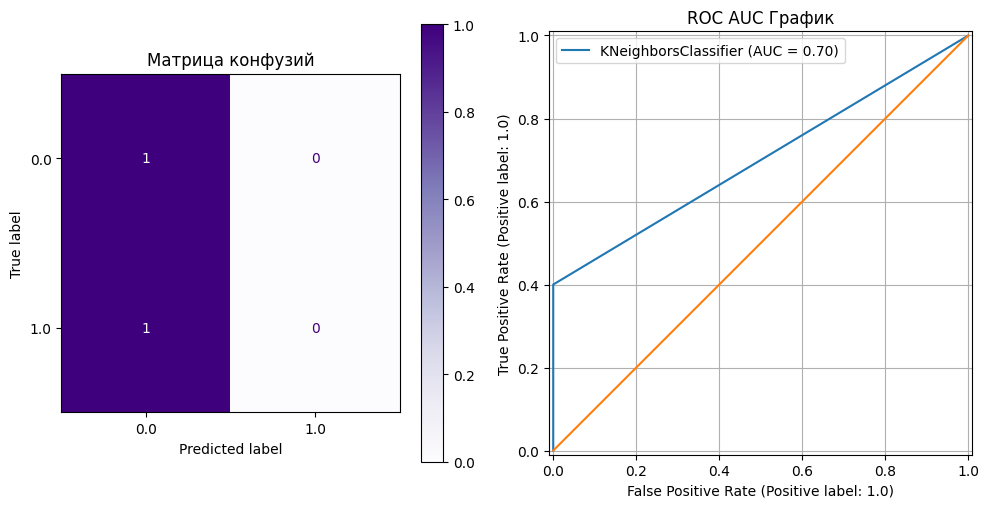

In [187]:
for i in [4,5,6]:
    print(f'результаты при {i} ближайших соседях')
    fit_eval(KNeighborsClassifier(n_neighbors=i), scaled_x_train, y_train, scaled_x_test, y_test)

используя маштабирование получил максимальную точность, равную 0.6, и это хуже чем без маштабирования на 0.1

при 4-х близжайших соседях результат случайный

при 6-и ближайших соседях что-то сломалось но аккуратность больше просто из-за совпадений... 

я так полагаю, что у меня скудный набор данных и результат получился таким-же.

итог:
- лучше без маштабирования
- точность 0.7
- но только при 2-3 близжайших соседях